# CODE 1 (stock_trading_data.csv)

In [ ]:
# Setup và load thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Q1

In [43]:
# a. Load the data into a DataFrame df (Đã làm ở bước SETUP)
df_stock = pd.read_csv('stock_trading_data.csv')
# b. Convert the Date column to datetime format
# Định dạng (format) '%d/%m/%Y' rất quan trọng vì ngày tháng đang là 02/01/2024
df_stock['Date'] = pd.to_datetime(df_stock['Date'], format='%d/%m/%Y')

# c. Print the first 5 rows and check for missing values
print("--- First 5 Rows ---")
print(df_stock.head())

print("--- Missing Values Check ---")
print(df_stock.isnull().sum())

--- First 5 Rows ---
        Date Ticker      Open    High     Low   Close   Volume       Sector
0 2024-01-02    VNM   82000.0   85000   81500   84500  1250000     Consumer
1 2024-01-02    HPG   28000.0   29500   27800   29000  2100000    Materials
2 2024-01-02    VIC   88000.0   92000   87500   91000   850000  Real Estate
3 2024-01-02    FPT       NaN   68000   64500   67500  1500000   Technology
4 2024-01-02    MSN  142000.0  148000  141000  145000   680000     Consumer
--- Missing Values Check ---
Date      0
Ticker    0
Open      1
High      0
Low       0
Close     0
Volume    0
Sector    0
dtype: int64


## Q2

In [44]:
# a. Select only rows where Sector is 'Technology' or 'Finance'
sectors_to_select = ['Technology', 'Finance']
df_tech_fin = df_stock[df_stock['Sector'].isin(sectors_to_select)]

# b. From this subset, filter only observations in 2021
df_2021 = df_tech_fin[df_tech_fin['Date'].dt.year == 2021]

# c. Print the number of observations per sector and per year
print("--- Observations per Sector (in 2021 subset) ---")
print(df_2021['Sector'].value_counts())

print("--- Observations per Year (in 2021 subset) ---")
print(df_2021['Date'].dt.year.value_counts())

--- Observations per Sector (in 2021 subset) ---
Series([], Name: count, dtype: int64)
--- Observations per Year (in 2021 subset) ---
Series([], Name: count, dtype: int64)


## Q3

In [45]:
# a. Group the dataset by Sector and calculate Average Close and Total Volume
df_grouped = df_stock.groupby('Sector').agg(
    Average_Close=('Close', 'mean'),
    Total_Volume=('Volume', 'sum')
)
print("--- Group by Sector (Avg Close & Total Volume) ---")
print(df_grouped)

# b. Create a pivot table: average closing price by Sector and by year
# Thêm cột 'Year' để sử dụng trong pivot table
df_stock['Year'] = df_stock['Date'].dt.year 
pivot_table = pd.pivot_table(df_stock, values='Close', index='Sector', columns='Year', aggfunc='mean')

print("--- Pivot Table (Avg Close by Sector & Year) ---")
print(pivot_table)

# c. Identify which sector had the highest average closing price in 2021
print("--- Highest Sector in 2021 ---")
if 2021 in pivot_table.columns:
    highest_sector_2021 = pivot_table[2021].idxmax()
    print(f"Sector with highest average close in 2021: {highest_sector_2021}")
else:
    print("No data available for the year 2021 in the provided dataset.")

--- Group by Sector (Avg Close & Total Volume) ---
             Average_Close  Total_Volume
Sector                                  
Consumer          114200.0       9920000
Materials          29460.0      11280000
Real Estate        91700.0       4590000
Technology         69100.0       8370000
--- Pivot Table (Avg Close by Sector & Year) ---
Year             2024
Sector               
Consumer     114200.0
Materials     29460.0
Real Estate   91700.0
Technology    69100.0
--- Highest Sector in 2021 ---
No data available for the year 2021 in the provided dataset.


## Q4

--- Data with Price_Level ---
  Ticker   Close Price_Level
0    VNM   84500      Medium
1    HPG   29000         Low
2    VIC   91000      Medium
3    FPT   67500      Medium
4    MSN  145000        High
--- Data with Month_Name ---
        Date Month_Name
0 2024-01-02    January
1 2024-01-02    January
2 2024-01-02    January
3 2024-01-02    January
4 2024-01-02    January
--- Average Close Price per Month ---
   Month Month_Name    Close
0      1    January  83732.0


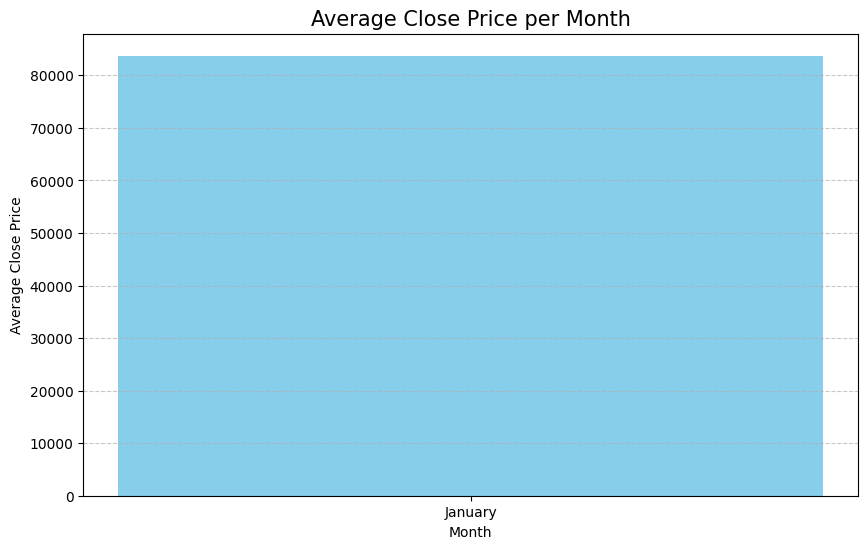

In [46]:
# a. Create a new column Price_Level
# lấy ra giá trị phần trăm thứ 10 và 90
q_10 = df_stock['Close'].quantile(0.10)
q_90 = df_stock['Close'].quantile(0.90)
# Sử dụng np.where lồng nhau để phân loại
df_stock['Price_Level'] = np.where(df_stock['Close'] > q_90, 'High',
                            np.where(df_stock['Close'] < q_10, 'Low', 'Medium'))

print("--- Data with Price_Level ---")
print(df_stock[['Ticker', 'Close', 'Price_Level']].head())


# b. Create a new column showing month name
df_stock['Month_Name'] = df_stock['Date'].dt.month_name()
print("--- Data with Month_Name ---")
print(df_stock[['Date', 'Month_Name']].head())


# c. Plot a bar chart of average Close price per month
# Tạo cột Month (số) để sắp xếp cho đúng thứ tự
df_stock['Month'] = df_stock['Date'].dt.month
monthly_avg = df_stock.groupby(['Month', 'Month_Name'])['Close'].mean().reset_index()
monthly_avg = monthly_avg.sort_values('Month')

print("--- Average Close Price per Month ---")
print(monthly_avg)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg['Month_Name'], monthly_avg['Close'], color='skyblue')
plt.title('Average Close Price per Month', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# CODE 2

## Q1

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# a. Load data into a DataFrame 
df_market = pd.read_csv('market_indices_data.csv')

# b. Convert the Date column to datetime
# Định dạng YYYY-MM-DD là mặc định của pandas, nên không cần 'format'
df_market['Date'] = pd.to_datetime(df_market['Date'])

# c. Create new column: Foreign_Net_Buy
df_market['Foreign_Net_Buy'] = df_market['Foreign_Buy'] - df_market['Foreign_Sell']

print("--- DataFrame with Foreign_Net_Buy (first 5 rows) ---")
print(df_market[['Date', 'Foreign_Buy', 'Foreign_Sell', 'Foreign_Net_Buy']].head())

--- DataFrame with Foreign_Net_Buy (first 5 rows) ---
        Date  Foreign_Buy  Foreign_Sell  Foreign_Net_Buy
0 2024-01-02        850.3         720.5            129.8
1 2024-01-03        920.5         780.2            140.3
2 2024-01-04        680.4         890.6           -210.2
3 2024-01-05        780.8         750.3             30.5
4 2024-01-08        950.2         710.8            239.4


## Q2

In [49]:
# a. Filter trading days
filtered_days = df_market[
    (df_market['VN_Index'] > 1220) & (df_market['Foreign_Net_Buy'] > 0)
]

# Print the count
print(f"Number of such days: {len(filtered_days)}")

# Print the average VN_Index
avg_vn_index = filtered_days['VN_Index'].mean()
print(f"Average VN_Index on these days: {avg_vn_index:.2f}")


# b. Create Total_Stocks and Advancing_Pct
df_market['Total_Stocks'] = df_market['Advancing'] + df_market['Declining'] + df_market['Unchanged']
df_market['Advancing_Pct'] = 100 * df_market['Advancing'] / df_market['Total_Stocks']


# c. Print the top 3 days with highest Advancing_Pct
top_3_advancing = df_market.sort_values(by='Advancing_Pct', ascending=False).head(3)

print("--- Top 3 Days by Advancing Pct ---")
columns_to_show = ['Date', 'VN_Index', 'Advancing', 'Declining', 'Unchanged', 'Advancing_Pct']
print(top_3_advancing[columns_to_show])

Number of such days: 9
Average VN_Index on these days: 1233.41
--- Top 3 Days by Advancing Pct ---
         Date  VN_Index  Advancing  Declining  Unchanged  Advancing_Pct
11 2024-01-17    1235.4        365         85         65      70.873786
15 2024-01-23    1245.3        355         95         65      68.932039
10 2024-01-16    1228.6        345         95         75      66.990291


## Q3

In [50]:
# a. Group by Sentiment and compute the table
sentiment_summary = df_market.groupby('Sentiment').agg(
    days=('Date', 'count'),
    avg_index=('VN_Index', 'mean'),
    avg_volume=('Trading_Value', 'mean'),
    avg_foreign_flow=('Foreign_Net_Buy', 'mean')
)

# b. Display the table sorted by avg_index descending
print("--- Sentiment Summary (sorted by avg_index desc) ---")
print(sentiment_summary.sort_values('avg_index', ascending=False))

--- Sentiment Summary (sorted by avg_index desc) ---
           days    avg_index    avg_volume  avg_foreign_flow
Sentiment                                                   
Positive     13  1227.584615  17919.838462        235.361538
Negative      5  1218.880000  16182.480000       -118.100000
Neutral       2  1207.250000  15300.350000        -54.700000


## Q4

--- Weekly Summary (first 3 rows) ---
       Week  VN_Index
0  2024-W01   1206.90
1  2024-W02   1217.18
2  2024-W03   1226.54


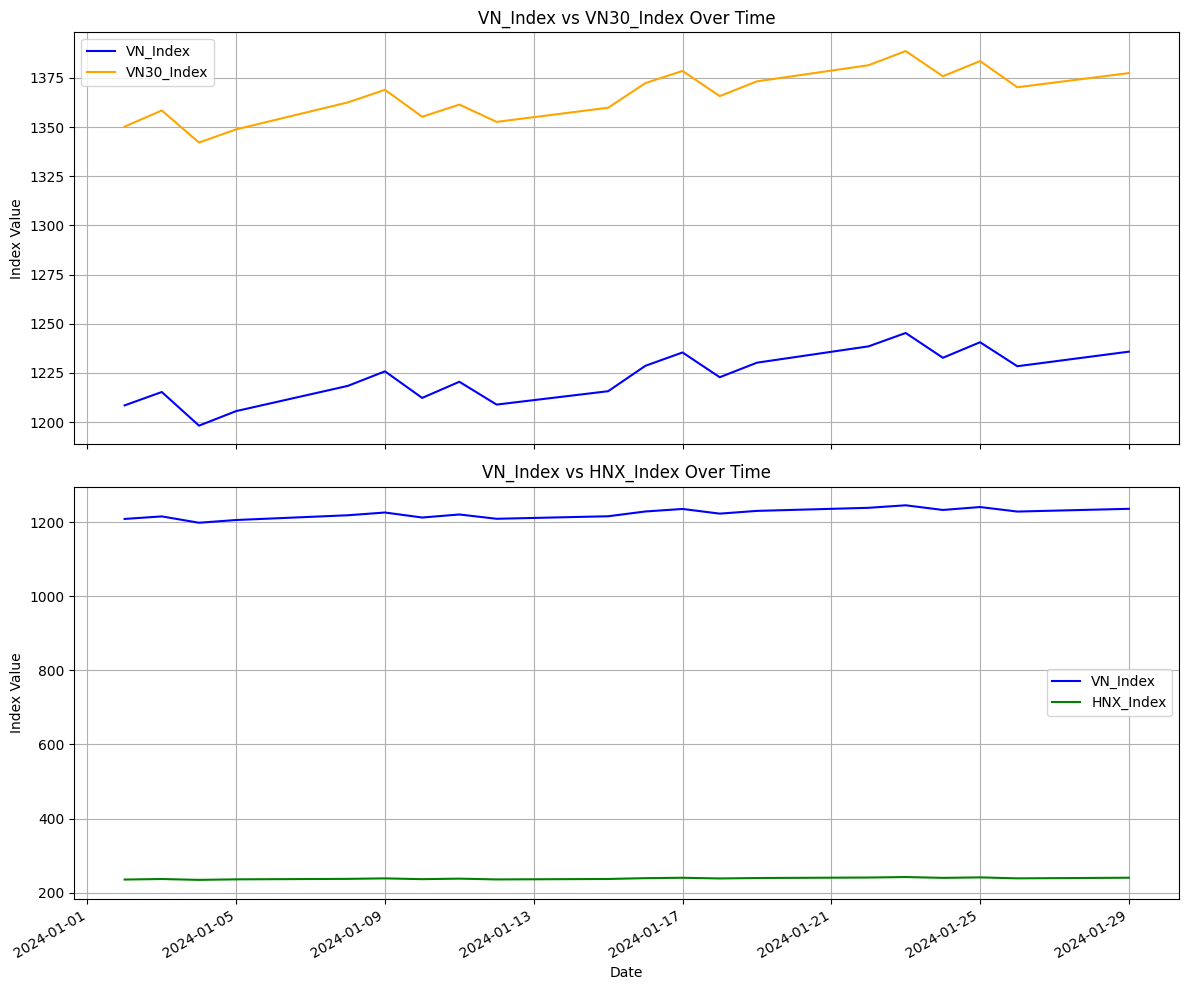

In [51]:
# a. Add Week (ISO year-week: %G-W%V)
df_market['Week'] = df_market['Date'].dt.strftime('%G-W%V')

# Produce a weekly summary of VN_Index
weekly_summary = df_market.groupby('Week')['VN_Index'].mean().reset_index()

print("--- Weekly Summary (first 3 rows) ---")
print(weekly_summary.head(3))


# b. Draw two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Plot 1: VN_Index and VN30_Index
axes[0].plot(df_market['Date'], df_market['VN_Index'], label='VN_Index', color='blue')
axes[0].plot(df_market['Date'], df_market['VN30_Index'], label='VN30_Index', color='orange')
axes[0].set_title('VN_Index vs VN30_Index Over Time')
axes[0].set_ylabel('Index Value')
axes[0].legend()
axes[0].grid(True)

# Plot 2: VN_Index and HNX_Index
axes[1].plot(df_market['Date'], df_market['VN_Index'], label='VN_Index', color='blue')
axes[1].plot(df_market['Date'], df_market['HNX_Index'], label='HNX_Index', color='green')
axes[1].set_title('VN_Index vs HNX_Index Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Index Value')
axes[1].legend()
axes[1].grid(True)

# Format the date axis
fig.autofmt_xdate() # Tự động xoay ngày cho dễ đọc
plt.tight_layout() # Sắp xếp bố cục
plt.show()